In [31]:
from IPython import display
import time
from matplotlib.pyplot import imshow, show, pause

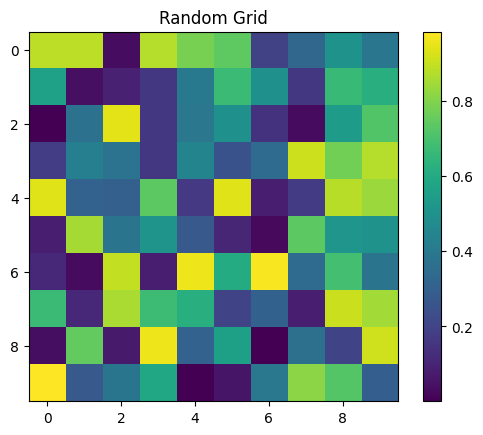

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set the size of the grid
grid_size = 10

# Initialize the grid with random numbers between 0 and 1
grid = np.random.rand(grid_size, grid_size)

# Plot the grid
plt.imshow(grid, cmap='viridis')
plt.colorbar()
plt.title('Random Grid')
plt.show()


In [9]:
# agent class
# preference, gridposition, initial_value, learning_rate, social_influence, social_influencability, range, productivity, memory etc. 

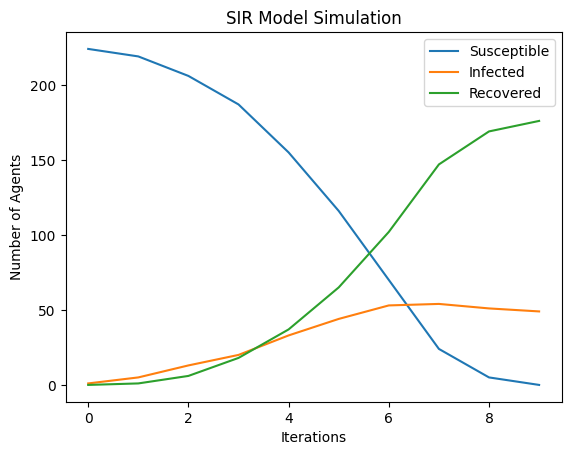

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set the size of the grid
grid_size = 15

# Initialize the grid with all agents having value 0 (S)
grid = np.zeros((grid_size, grid_size))

# Choose the agent in the middle of the grid and change its value to 1 (I)
middle_agent = (grid_size // 2, grid_size // 2)
grid[middle_agent] = 1

# Define the infection probability
infection_prob = 0.7

# Define the recovery time (number of iterations until an infected agent recovers)
recovery_time = 1

# Define the number of iterations to simulate
num_iterations = 10

# Track the number of agents in each state (S, I, R) over time
num_susceptible = []
num_infected = []
num_recovered = []

# Simulation loop
for _ in range(num_iterations):
    # Track the number of agents in each state for the current iteration
    num_s = np.count_nonzero(grid == 0)
    num_i = np.count_nonzero(grid == 1)
    num_r = np.count_nonzero(grid == 2)
    num_susceptible.append(num_s)
    num_infected.append(num_i)
    num_recovered.append(num_r)
    
    # Create a copy of the grid for the next iteration
    next_grid = grid.copy()
    
    # Iterate over each agent in the grid
    for i in range(grid_size):
        for j in range(grid_size):
            # Check if the agent is infected
            if grid[i, j] == 1:
                # Infect its 8 neighbors with a certain probability
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        if dx == 0 and dy == 0:
                            continue  # Skip the current agent
                        nx, ny = i + dx, j + dy
                        # Check if the neighbor is susceptible and infect it with a certain probability
                        if (0 <= nx < grid_size) and (0 <= ny < grid_size) and grid[nx, ny] == 0:
                            if np.random.random() < infection_prob:
                                next_grid[nx, ny] = 1  # Infect the neighbor
                                next_grid[i, j] = 2  # Infected agent becomes recovered
        
    # Update the grid for the next iteration
    grid = next_grid

# Plot the number of agents in each state over time
plt.plot(range(num_iterations), num_susceptible, label='Susceptible')
plt.plot(range(num_iterations), num_infected, label='Infected')
plt.plot(range(num_iterations), num_recovered, label='Recovered')
plt.xlabel('Iterations')
plt.ylabel('Number of Agents')
plt.title('SIR Model Simulation')
plt.legend()
plt.show()


In [102]:
import numpy as np
def get_neighbors_indices(grid, row, col):
    num_rows, num_cols = grid.shape
    # Define the possible offsets for neighbors
    offsets = [(-1, -1), (-1, 0), (-1, 1),
            (0, -1),           (0, 1),
            (1, -1),  (1, 0),  (1, 1)]
    neighbors = []
    # Iterate through the offsets and check for neighbors
    for offset in offsets:
        neighbor_row = (row + offset[0]) % num_rows
        neighbor_col = (col + offset[1]) % num_cols
        neighbors.append((neighbor_row, neighbor_col))
    return neighbors

In [ ]:
# have travellers – some people are superspreaders. 
# does geography matter? (no)
# incubation period ?
# do people die? 
# can people get vaccinated? (how effective is a vaccine?)
# how many exposures does it take to get infected? (3)
# you can also think of trends
# how many starting infections? 
# grid size? 
# do 3 people 


In [44]:
%matplotlib inline
import random
import numpy as np 
from numpy.random import rand, randint
from math import sqrt
import matplotlib.pyplot as plt
import time
from IPython import display
from matplotlib.pyplot import imshow, show, pause
import pandas as pd


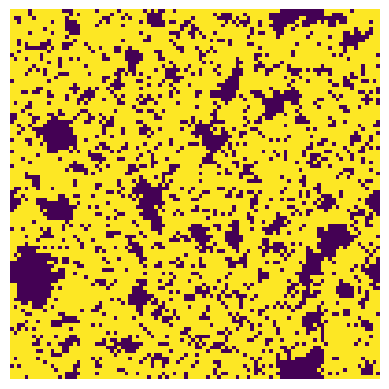

In [56]:
# population size
N = 10000

# initialise an empty array with the population size
SIR = np.zeros(N)

# 0 = susceptible, i = infected and infectious, r = recovered

# get a random index for the SIR array
rand_index = randint(0, len(SIR)) 

# random patient 0: first infection
SIR[rand_index] = 1  

# plot the 1-dimensional array as a 2D matrix, by reshaping it. Then display
im = plt.imshow(SIR.reshape(int(sqrt(N)), int(sqrt(N))))
plt.axis('off')

# while there is at least one active infection, the cascade keeps going
while 1 in SIR: 

    SIR_M = SIR.reshape(int(sqrt(N)), int(sqrt(N)))

    # get neighbors of infected person
    neighbors = []

    infected = np.nonzero(SIR == 1) #index of infected person 

    for i in infected[0]:
        #neighbors += [get_neighbor_indices(SIR_M, i)]
        neighbors += [get_torus_neighbor_indices(SIR_M, i)]

    neighbors = [n for sublist in neighbors for n in sublist]

    unique_neighbors = list(set(neighbors))

    # Keep only those who are susceptible, i.e. whose value is 0

    susceptible_neighbors = np.array([n for n in unique_neighbors if SIR[n] == 0])

    sharing_p = 0.30 

    actually_infected = rand(1, len(susceptible_neighbors)) 

    got_it = (actually_infected < sharing_p)

    new_inf = susceptible_neighbors[got_it[0]] #why is got_it a 2D array??

    # those who were already infected recover (2)
    SIR[np.nonzero(SIR == 1)] = 2

    # the newly infected become infectious (1)
    SIR[new_inf] = 1

    # update figure
    im.set_data(SIR.reshape(int(sqrt(N)), int(sqrt(N))))

    # show figure
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # pause for a split second 
    time.sleep(0.1)
    

# print all the recovered cells
#print(f'in this cascade, {np.count_nonzero(SIR == 2)} people were infected')

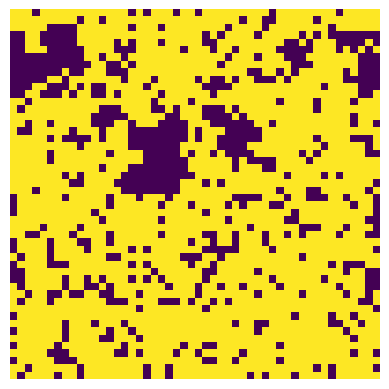

In [59]:
# population size
N = 2500

# initialise an empty array with the population size
SIR = np.zeros(N)

# 0 = susceptible, i = infected and infectious, r = recovered

# get a random index for the SIR array
rand_index = randint(0, len(SIR)) 

# random patient 0: first infection
SIR[rand_index] = 1  

# plot the 1-dimensional array as a 2D matrix, by reshaping it. Then display
im = plt.imshow(SIR.reshape(int(sqrt(N)), int(sqrt(N))))
plt.axis('off')

# while there is at least one active infection, the cascade keeps going
while 1 in SIR: 

    SIR_M = SIR.reshape(int(sqrt(N)), int(sqrt(N)))

    # get neighbors of infected person
    neighbors = []

    infected = np.nonzero(SIR == 1) #index of infected person 

    for i in infected[0]:
        #neighbors += [get_neighbor_indices(SIR_M, i)]
        neighbors += [helper_functions.get_torus_neighbor_indices(SIR_M, i)]

    neighbors = [n for sublist in neighbors for n in sublist]

    unique_neighbors = list(set(neighbors))

    # Keep only those who are susceptible, i.e. whose value is 0

    susceptible_neighbors = np.array([n for n in unique_neighbors if SIR[n] == 0])

    sharing_p = 0.30 

    actually_infected = rand(1, len(susceptible_neighbors)) 

    got_it = (actually_infected < sharing_p)

    new_inf = susceptible_neighbors[got_it[0]] #why is got_it a 2D array??

    # those who were already infected recover (2)
    SIR[np.nonzero(SIR == 1)] = 2

    # the newly infected become infectious (1)
    SIR[new_inf] = 1

    # update figure
    im.set_data(SIR.reshape(int(sqrt(N)), int(sqrt(N))))

    # show figure
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # pause for a split second 
    time.sleep(0.1)
    

# print all the recovered cells
#print(f'in this cascade, {np.count_nonzero(SIR == 2)} people were infected')

In [82]:
infected

(array([ 0,  0,  0, ..., 99, 99, 99]), array([ 0,  1,  2, ..., 97, 98, 99]))

In [88]:
for x,y in zip(infected[0],infected[1]): 
    print(x,y)

37 47


In [76]:
for x,y in infected:
    print(x,y)

ValueError: not enough values to unpack (expected 2, got 1)

In [90]:
neighbors

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [92]:
infected = np.nonzero(SIR ==1) #index of infected person 

for x,y in zip(infected[0],infected[1]): 
    neighbors = SIR[x-1:x+2, y-1:y+2]

In [99]:
np.indices((3, 3)) - 1

array([[[-1, -1, -1],
        [ 0,  0,  0],
        [ 1,  1,  1]],

       [[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]])

In [94]:
import numpy as np

# Create a 10x10 matrix
matrix = np.arange(100).reshape(10, 10)

# Indices of the point
x = 5
y = 5

# Get the indices of the eight neighbors
rows, cols = matrix.shape
neighbor_indices = np.indices((3, 3)) - 1
neighbor_x = np.clip(x + neighbor_indices[0], 0, rows - 1)
neighbor_y = np.clip(y + neighbor_indices[1], 0, cols - 1)

# Display the neighbor indices
print(neighbor_x)
print(neighbor_y)


[[4 4 4]
 [5 5 5]
 [6 6 6]]
[[4 5 6]
 [4 5 6]
 [4 5 6]]


In [93]:
neighbor_x = np.clip(x + neighbor_indices[0], 0, rows - 1)
neighbor_y = np.clip(y + neighbor_indices[1], 0, cols - 1)

# Display the neighbor indices
print(neighbor_x)
print(neighbor_y)

NameError: name 'neighbor_indices' is not defined

In [114]:
infected(24, 51)

TypeError: 'tuple' object is not callable

In [125]:
import itertools
flattened = list(itertools.chain(*neighbors))
flattened

[(99, 99),
 (99, 0),
 (99, 1),
 (0, 99),
 (0, 1),
 (1, 99),
 (1, 0),
 (1, 1),
 (99, 0),
 (99, 1),
 (99, 2),
 (0, 0),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2)]

In [121]:
neighbors = []

infected = np.nonzero(SIR == 0) #index of infected person 

for i in infected:
    neighbors.append(get_neighbors_indices(SIR, i[0], i[1]))

In [148]:
infected[0]

array([82])

In [154]:
infected[0]

array([83])

In [152]:
neighbors = []

infected = np.nonzero(SIR == 1) #index of infected person 

for x in infected[0]:
    for y in infected[1]:
        neighbors.append(get_neighbors_indices(SIR, x[0], y[1]))

IndexError: invalid index to scalar variable.

IndexError: invalid index to scalar variable.

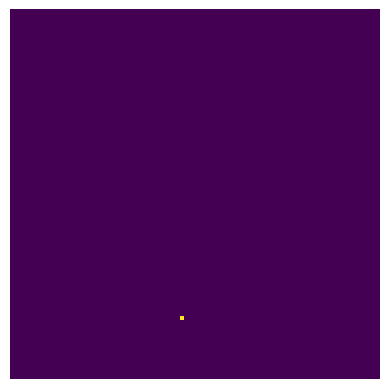

In [150]:
## there must be a way of doing this that doesn't require back and forth conversion of flat and matrix views of the grid 

side = 100

# initialise an empty array with the population size
SIR = np.zeros((side, side))

# random patient 0: first infection
SIR[randint(0, side), randint(0, side)] = 1  

# plot the 1-dimensional array as a 2D matrix, by reshaping it. Then display
im = plt.imshow(SIR)
plt.axis('off')

# while there is at least one active infection, the cascade keeps going
while 1 in SIR: 

    # get neighbors of infected person
    neighbors = []

    infected = np.nonzero(SIR == 1) #index of infected person 

    for x in infected[0]:
        for y in infected[1]:
            neighbors.append(get_neighbors_indices(SIR, x[0], y[1]))

    flattened = list(itertools.chain(*neighbors))
    
    unique_neighbors = list(set(flattened))

    # Keep only those who are susceptible, i.e. whose value is 0

    susceptible_neighbors = np.array([n for n in unique_neighbors if SIR[n] == 0])

    sharing_p = 0.30 

    actually_infected = rand(1, len(susceptible_neighbors)) 

    got_it = (actually_infected < sharing_p)

    new_inf = susceptible_neighbors[got_it[0]] #why is got_it a 2D array??

    # those who were already infected recover (2)
    SIR[np.nonzero(SIR == 1)] = 2

    # the newly infected become infectious (1)
    SIR[new_inf] = 1

    # update figure
    im.set_data(SIR.reshape(int(sqrt(N)), int(sqrt(N))))

    # show figure
    display.display(plt.gcf())
    display.clear_output(wait=True)

    # pause for a split second 
    time.sleep(0.1)
    

# print all the recovered cells
#print(f'in this cascade, {np.count_nonzero(SIR == 2)} people were infected')

In [ ]:
# given a matrix, find the neighboring cells
# building on the previous function, this function wraps around the borders, so that agents on the right border of the 
# matrix are neighbors with agents on the left border, and the top row is next to
# the bottom row

def get_torus_neighbor_indices(matrix, index):
    neighbors = []
    
    # for the vector index, get the indices in a 2D matrix 
    i, j = get_indices(matrix, index)
    
    # for all neighbouring i and j, but not for matrix[i][j]
    # i should not be negative or exceed the total row numbers
    # j should not be negative or exceed the total column numbers
    for row in [i-1, i, i+1]:
        if row >= matrix.shape[0]:
            row -= matrix.shape[0]
        elif row < 0:
            row += matrix.shape[0]
        for col in [j-1, j, j+1]:
            if col >= matrix.shape[0]:
                col -= matrix.shape[0]
            elif col < 0:
                col += matrix.shape[0]
            
            if not (row == i and col == j):
                    # row_index * number of 
                neighbors.append((row* matrix.shape[1] + col))
    return neighbors